In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Imports

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

##Data

In [ ]:
data_original = pd.read_csv('drive/MyDrive/СпецПрога/6 Clustering/customer_dataset.csv')
data = data_original.copy()
data.drop(columns=['ID'], inplace=True)
data.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [ ]:
data.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

In [ ]:
data.shape

(8068, 9)

In [ ]:
data.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object

In [ ]:
for col in data.select_dtypes(include=['object']).columns.values:
    print(col + ': ', len(data[col].unique()))
    print(data[col].value_counts(), '\n')

Gender:  2
Male      4417
Female    3651
Name: Gender, dtype: int64 

Ever_Married:  3
Yes    4643
No     3285
Name: Ever_Married, dtype: int64 

Graduated:  3
Yes    4968
No     3022
Name: Graduated, dtype: int64 

Profession:  10
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64 

Spending_Score:  3
Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64 

Var_1:  8
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64 



In [ ]:
imputer = KNNImputer(n_neighbors=3)
data['Work_Experience'] = imputer.fit_transform(data[['Work_Experience']])
data['Family_Size'] = imputer.fit_transform(data[['Family_Size']])

for col in data.select_dtypes(include=['object']).columns.values:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [ ]:
data.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

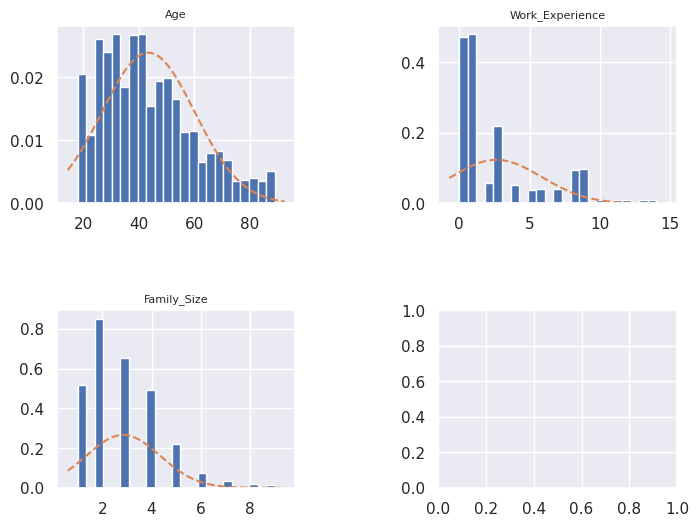

In [ ]:
keys = data.select_dtypes(include=['int64', 'float64']).columns.values
keys = list(keys)

fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.6, hspace=0.6)
fig.set_size_inches(8, 6)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(data[key], density=True, bins=23)
    
    loc = data[key].mean()
    scale = data[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key, fontsize=8)

In [ ]:
columns_object = data.select_dtypes(['object']).columns.values
for col in columns_object:
    ohe = pd.get_dummies(data[col])
    data = pd.merge(data, ohe, left_index=True, right_index=True)
    data.drop(columns=[col], inplace=True)

In [ ]:
data.shape

(8068, 28)

In [ ]:
polinomial = PolynomialFeatures(2, include_bias=False)
data_polinomial = polinomial.fit_transform(data)

In [ ]:
data_polinomial.shape

(8068, 434)

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_polinomial)

In [ ]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
W = model.fit_transform(data_scaled)

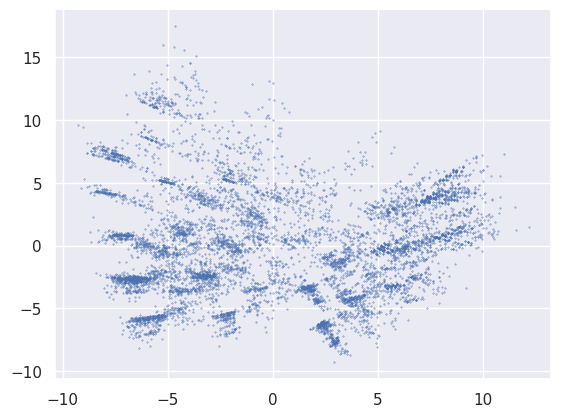

In [ ]:
plt.scatter(W[:, 0], W[:, 1], s=0.1)

##Clustering

In [ ]:
data_cur = data_scaled.copy()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

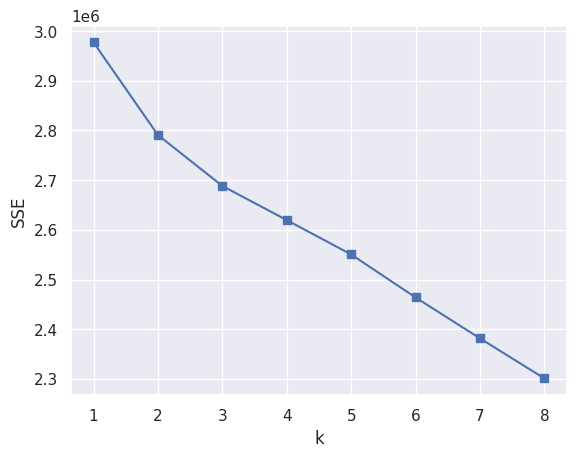

In [ ]:
# метод локтя
from sklearn.cluster import KMeans

SSE = [] # Сумма квадратов ошибок для каждого результата

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) # построить кластер
    kmeans.fit(data_cur)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

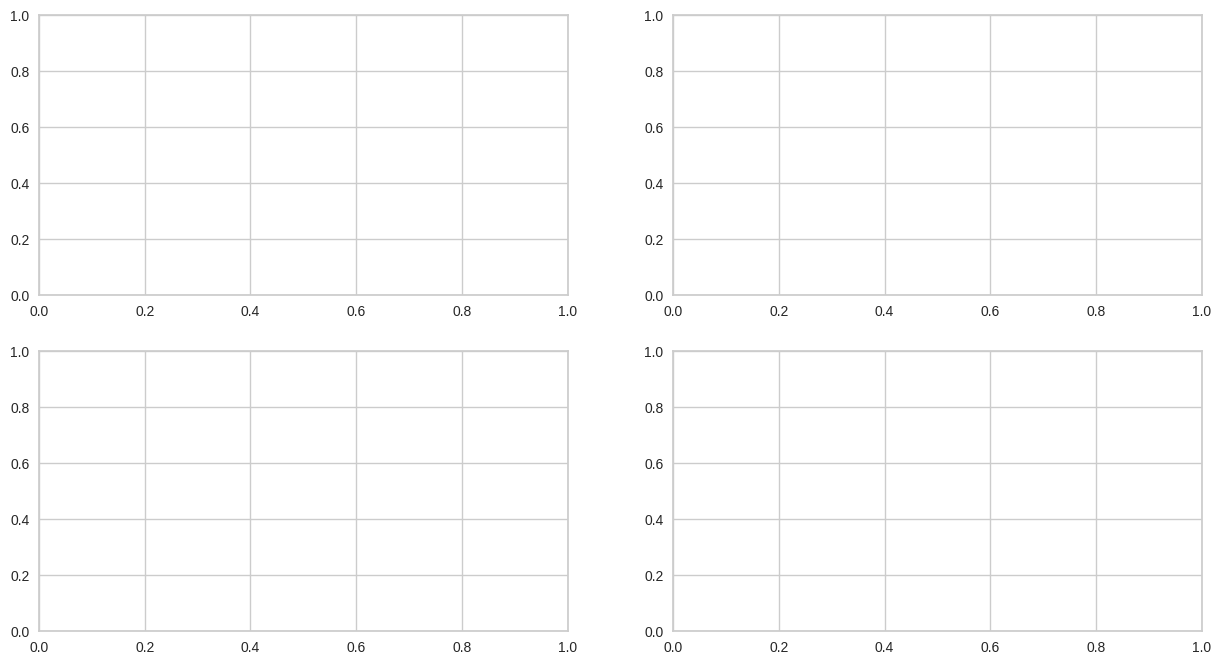

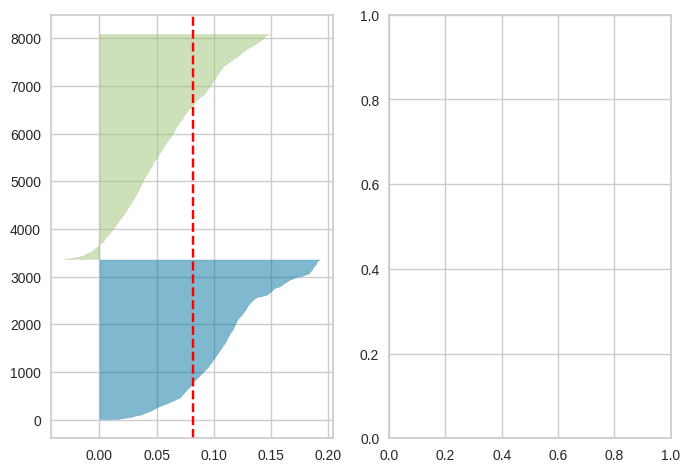

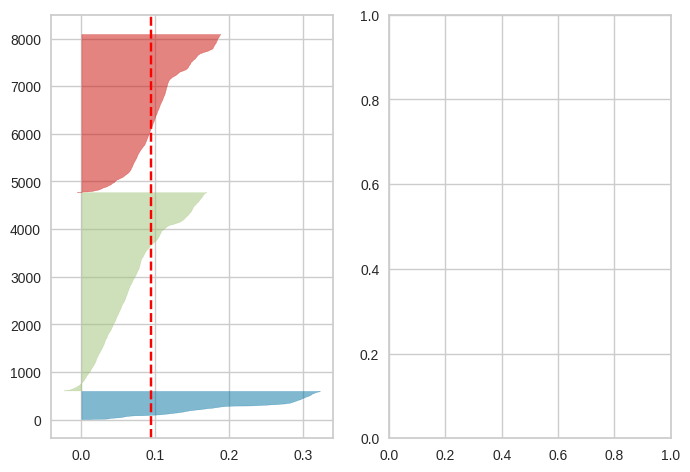

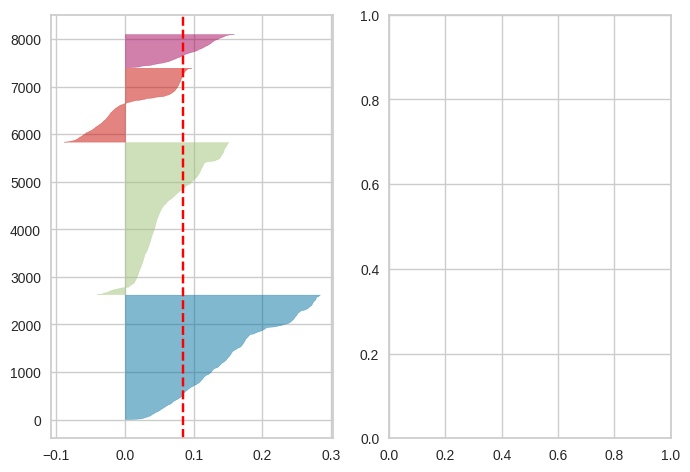

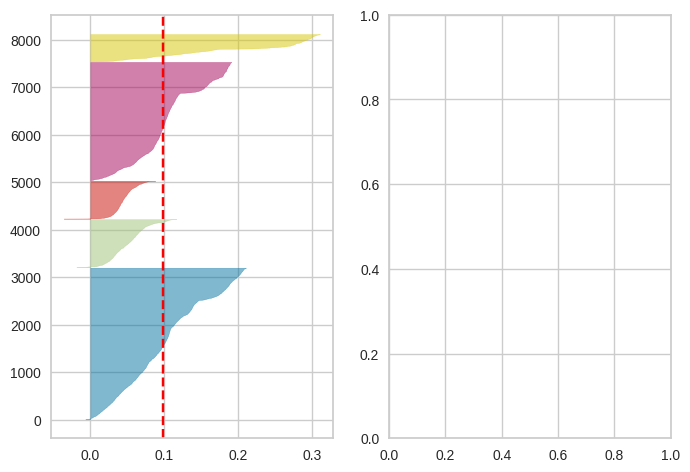

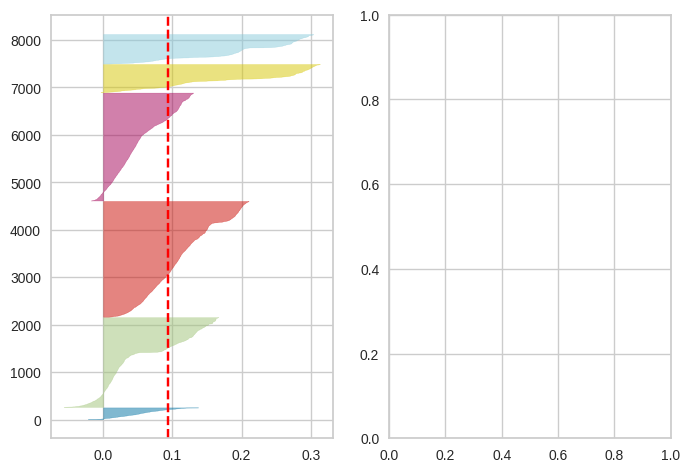

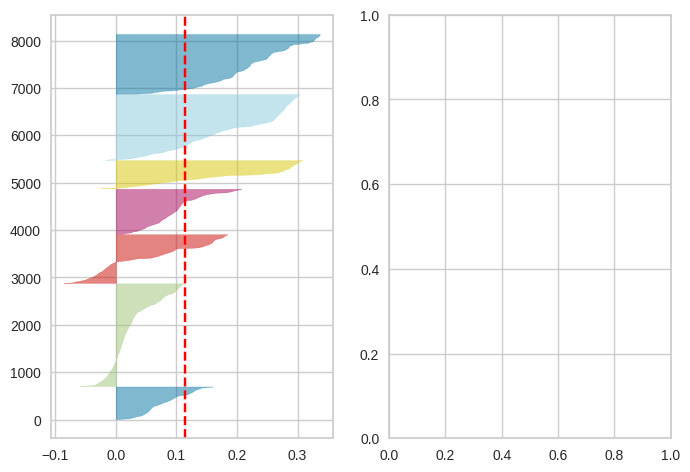

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in range(2,8):
    fig, (ax1, ax2) = plt.subplots(1, 2)

    km = KMeans(n_clusters=i, random_state=42)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax1)
    visualizer.fit(data_cur)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.08161808812341945


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.08855222135680783


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.1011768172933702


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.07775672018226831


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.09788483284769635


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.11348761838252627


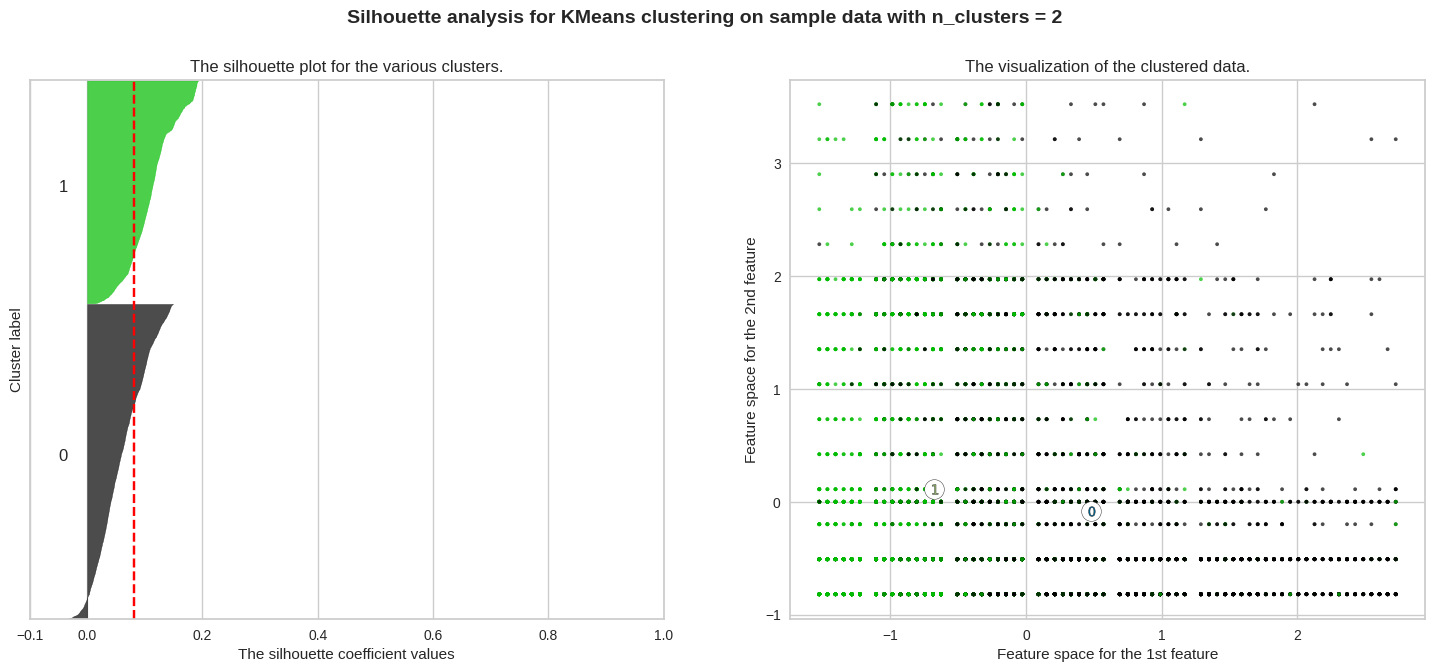

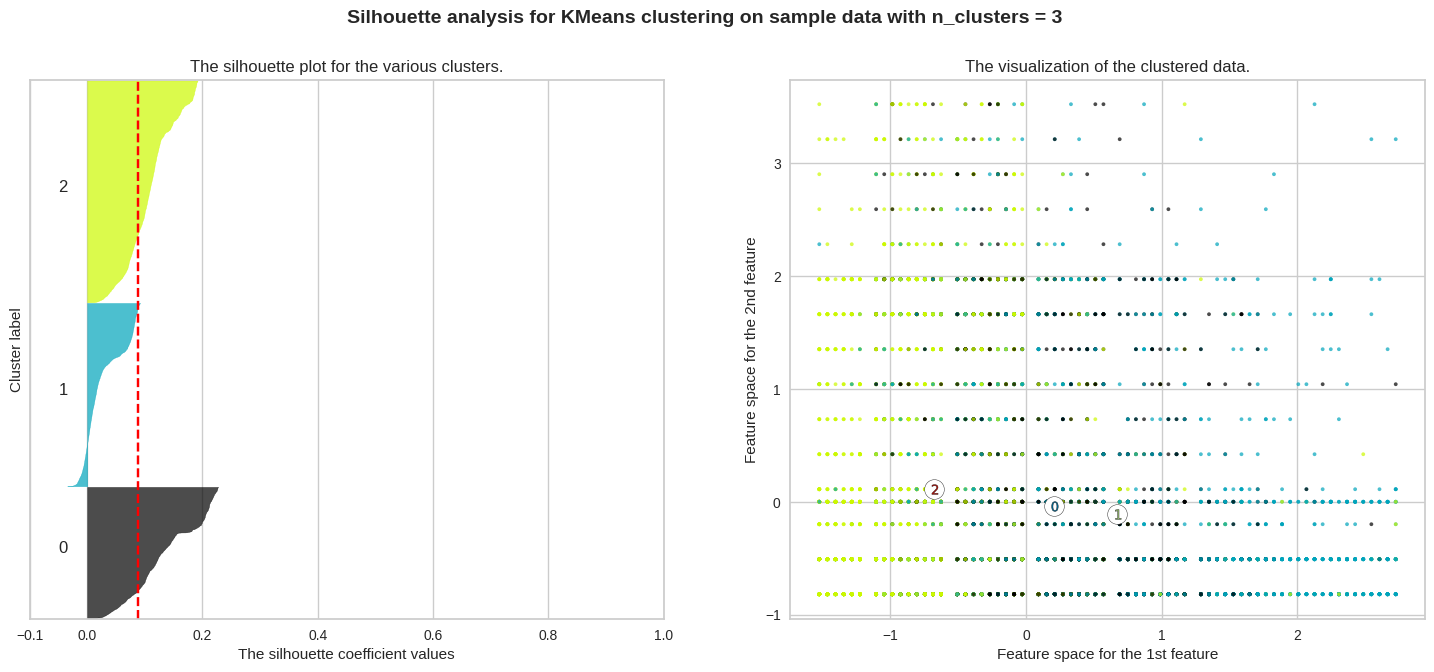

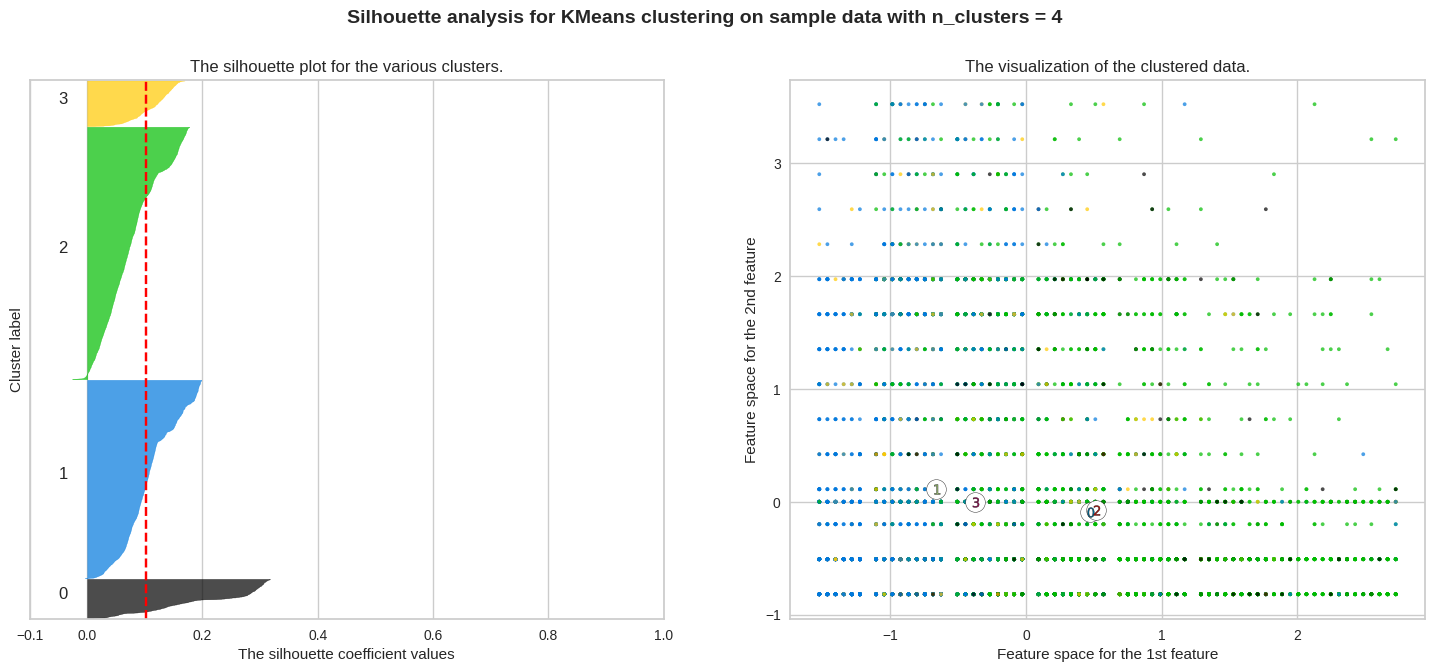

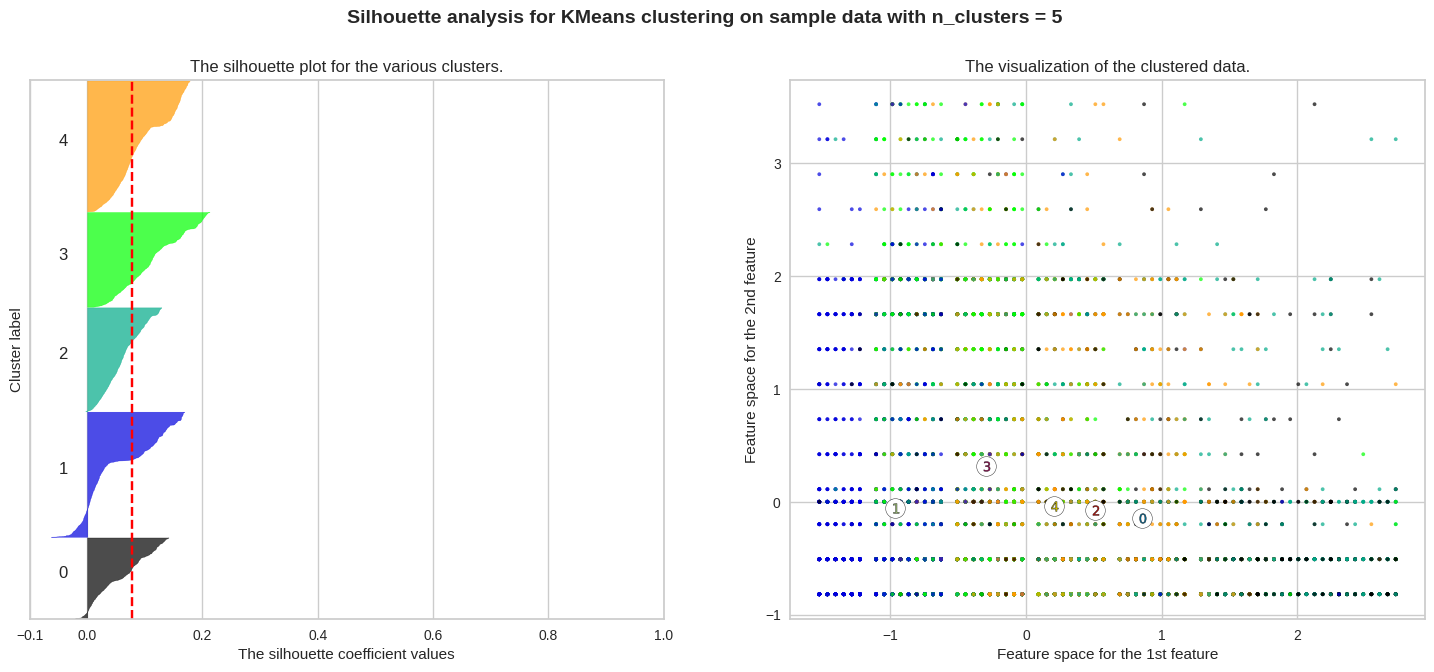

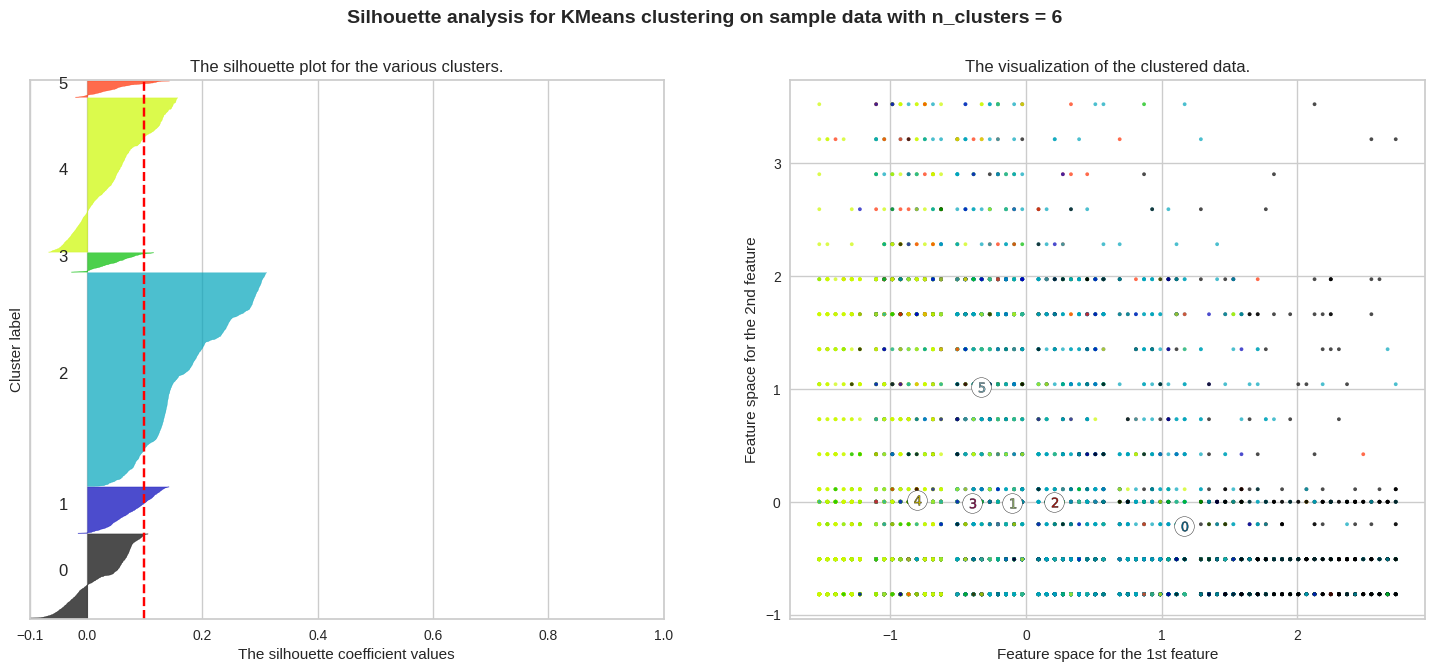

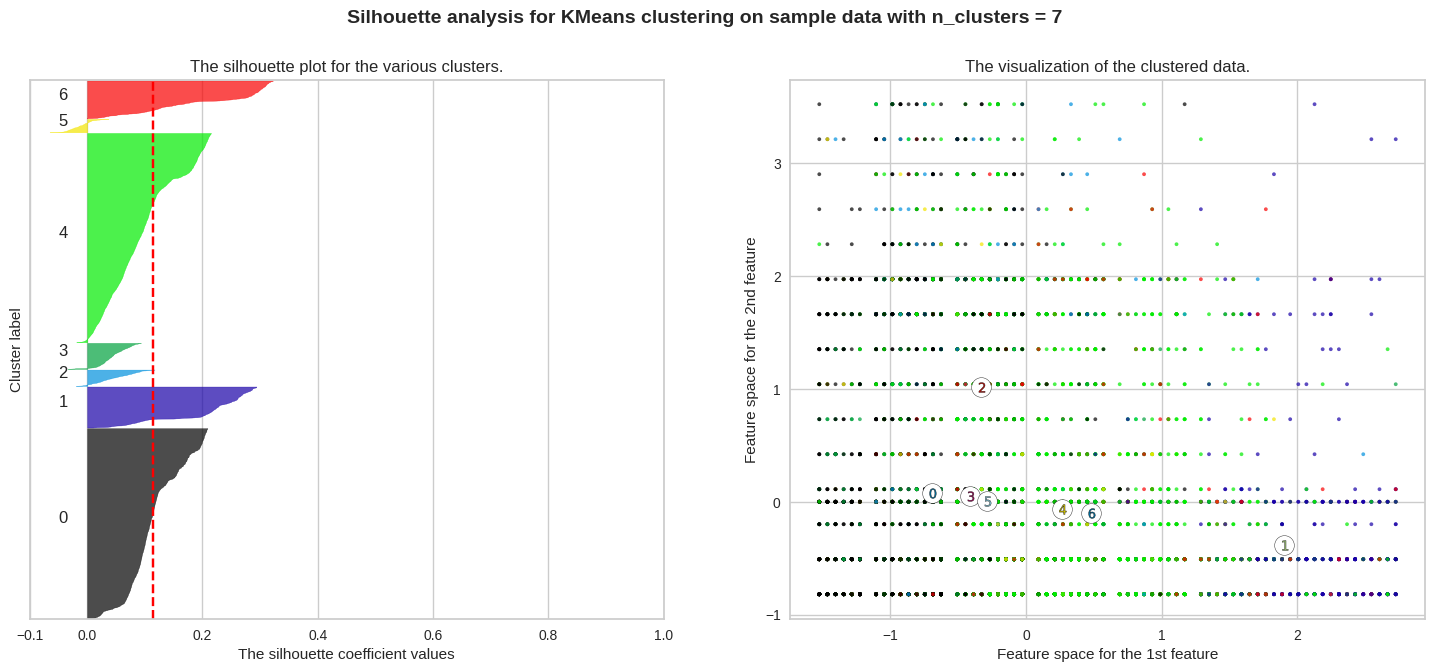

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

for n_clusters in range(2,8):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_cur) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_cur)

    silhouette_avg = silhouette_score(data_cur, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

#     # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_cur, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_cur[:, 0], data_cur[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

##Models

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.03, min_samples=7).fit(data_cur) # плохо

In [ ]:
pd.Series(db.labels_).value_counts()

-1    8040
 0       7
 1       7
 2       7
 3       7
dtype: int64

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

n_cluster = 4
Agg_hc = AgglomerativeClustering(n_clusters = n_cluster, affinity = 'euclidean', linkage = 'ward')
y_hc = Agg_hc.fit_predict(data_cur)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(data_cur)
y_hc = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pd.Series(y_hc).value_counts()

2    3306
3    3024
1    1535
0     203
dtype: int64

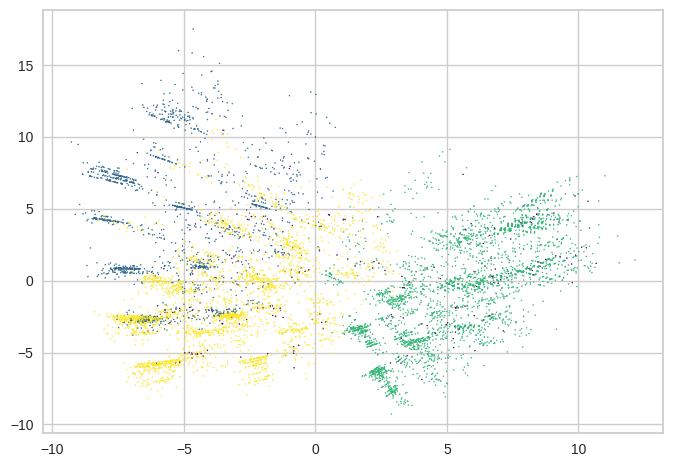

In [ ]:
plt.scatter(W[:, 0], W[:, 1], s=0.5, c=y_hc, cmap="viridis")

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(learning_rate='auto', init='random', n_jobs=-1, random_state=0).fit_transform(data_cur)

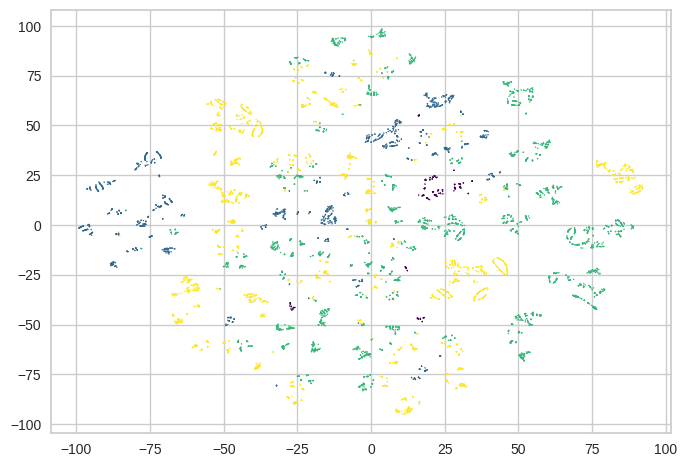

In [ ]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=0.5, c=y_hc, cmap="viridis")

In [ ]:
check = pd.read_csv('drive/MyDrive/СпецПрога/6 Clustering/train.csv')
hc = check['Segmentation']

<Axes: >

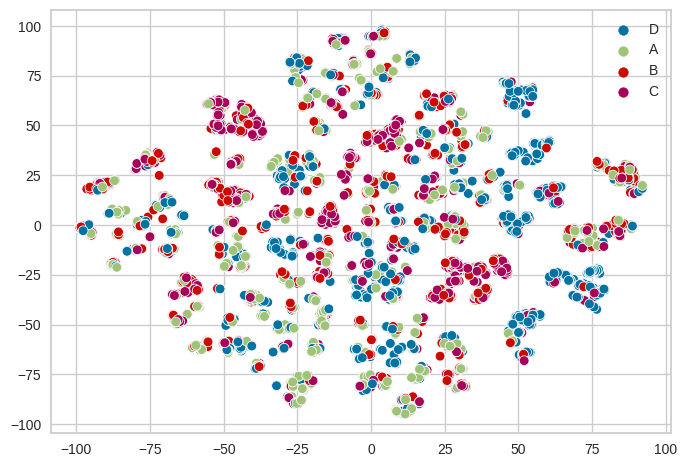

In [ ]:
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=hc.values)

<Axes: >

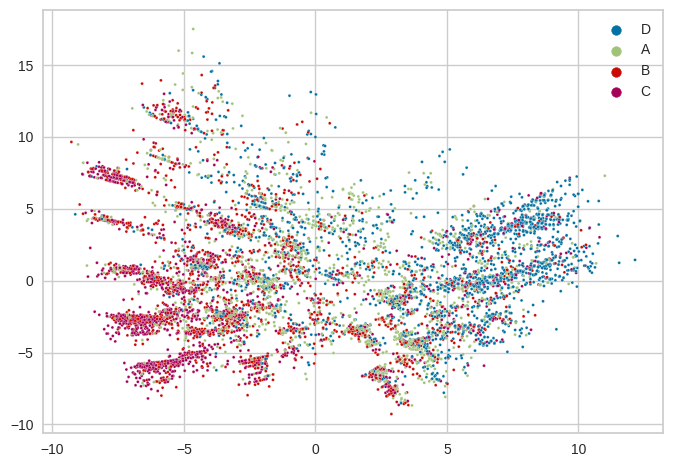

In [ ]:
sns.scatterplot(x=W[:, 0], y=W[:, 1], hue=hc.values, s=4.5)

In [ ]:
subm_df = pd.DataFrame({'ID': data_original['ID'], 'Segmentation': data_original['Spending_Score'] + 
                        data_original['Var_1'].fillna(method='ffill')})

In [ ]:
subm_df['Segmentation'] = y_hc
labelencoder = dict()
i = 1
for x in subm_df['Segmentation']:
  if x not in labelencoder:
    labelencoder[x] = i
    i += 1
subm_df['Segmentation'] = subm_df['Segmentation'].apply(lambda x: labelencoder[x])

In [ ]:
subm_df.to_csv('drive/MyDrive/СпецПрога/6 Clustering/submission.csv', index=False)